In [1]:
import numpy as np
import seaborn as sns
from utils import load_citation
import networkx as nx
import scipy

In [55]:
from matplotlib import pyplot as plt

## Rayleight Quotient for random vectors

In [2]:
adj, features, labels , idx_tr, idx_va, idx_te = load_citation("cora", "", False)

In [6]:
coranx = nx.from_numpy_array(adj.to_dense().numpy())

In [7]:
coranx.number_of_edges(), coranx.number_of_nodes()

(5278, 2708)

In [31]:
coraL = nx.normalized_laplacian_matrix(coranx)
coraL = coraL.todense()

In [32]:
def r(x, coraL):
    return x.T.dot(coraL).dot(x) / x.T.dot(x)

In [33]:
r(np.ones(2708), coraL)

matrix([[0.1419338]])

In [34]:
def random01(size, t=0.5):
    x = np.zeros(size)
    for i in range(size):
        if np.random.random() < t:
            x[i] = 1
    return x

In [35]:
r(random01(2708), coraL)

matrix([[0.56700902]])

In [36]:
for _ in range(100):
    print(r(random01(2708), coraL))

[[0.56489249]]
[[0.57486334]]
[[0.56900507]]
[[0.57024416]]
[[0.57897177]]
[[0.5832301]]
[[0.56509213]]
[[0.56996615]]
[[0.57261711]]
[[0.56482788]]
[[0.57563925]]
[[0.56823192]]
[[0.58669429]]
[[0.58520197]]
[[0.57903139]]
[[0.57489676]]
[[0.59201531]]
[[0.57021078]]
[[0.55455155]]
[[0.56969523]]
[[0.54935662]]
[[0.57208116]]
[[0.56053586]]
[[0.57160436]]
[[0.55682097]]
[[0.57517816]]
[[0.58551373]]
[[0.56615798]]
[[0.56804126]]
[[0.58262206]]
[[0.58064526]]
[[0.56613449]]
[[0.58427486]]
[[0.5589693]]
[[0.58059576]]
[[0.59215142]]
[[0.56499429]]
[[0.58372985]]
[[0.55731642]]
[[0.58706912]]
[[0.58088974]]
[[0.57478079]]
[[0.56694446]]
[[0.57456853]]
[[0.57078655]]
[[0.58971678]]
[[0.55787064]]
[[0.59957266]]
[[0.54814672]]
[[0.600158]]
[[0.57423336]]
[[0.56324311]]
[[0.54962367]]
[[0.58106065]]
[[0.56648495]]
[[0.58042874]]
[[0.55877282]]
[[0.58146933]]
[[0.55220002]]
[[0.55161895]]
[[0.57472752]]
[[0.56169388]]
[[0.58740552]]
[[0.57255805]]
[[0.57809805]]
[[0.57909948]]
[[0.57360318]]

In [37]:
mis = nx.maximal_independent_set(coranx)

In [39]:
x = np.zeros(2708)
for i in mis:
    x[i] = 1

In [40]:
r(x, coraL)

matrix([[1.]])

In [41]:
np.sum(x)

1271.0

In [42]:
u, v = np.linalg.eig(coraL)

In [47]:
idx = u.argsort()[::-1]   
u = u[idx]
v = v[:,idx]

In [68]:
u

array([ 2.00000000e+00+0.j,  2.00000000e+00+0.j,  2.00000000e+00+0.j, ...,
       -2.22565218e-15+0.j, -2.31053597e-15+0.j, -3.25125522e-15+0.j])

In [77]:
coeff = np.real(v.T.dot(random01(2708)))

In [78]:
coeff

matrix([[ 0.81970249,  0.27268717,  0.17750376, ..., -0.48404624,
          1.32553498,  0.91938819]])

/home/gear/anaconda3/envs/gfnn/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


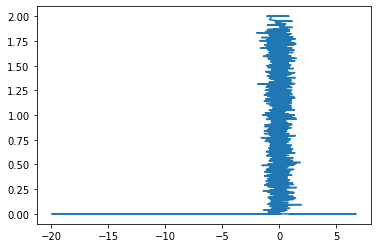

In [79]:
plt.figure()
plt.plot(coeff.T, u)
plt.show()

/home/gear/anaconda3/envs/gfnn/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


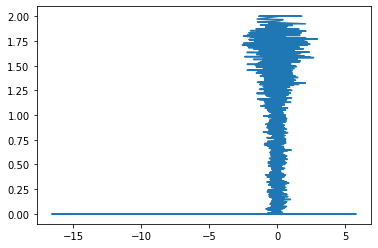

In [80]:
coeff = np.real(v.T.dot(x))
plt.figure()
plt.plot(coeff.T, u)
plt.show()

In [85]:
subcoranx = None
for i in nx.connected_components(coranx):
    subcoranx = i
    break

In [87]:
subcoranx = coranx.subgraph(subcoranx)

In [93]:
subcoranx.number_of_nodes()

2485

In [89]:
subcoraL = nx.normalized_laplacian_matrix(subcoranx)
subcoraL = subcoraL.todense()

In [90]:
sl, sv = np.linalg.eigh(subcoraL)

In [92]:
idx = sl.argsort()[::-1]   
sl = sl[idx]
sv = sv[:,idx]

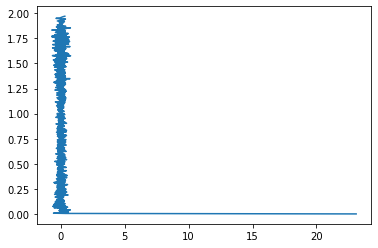

In [151]:
coeff = np.zeros((1,2485))
for _ in range(1000):
    coeff += sv.T.dot(random01(2485))
coeff /= 1000
plt.figure()
plt.plot(coeff.T, sl)
plt.show()

In [191]:
rvec = random01(2485)

In [192]:
coeff = np.array(sv.T.dot(rvec)).squeeze()

In [193]:
coeff[:100] = 0

In [194]:
coeff[-100:] = 0

In [195]:
reconstructed = np.array(sv.dot(coeff)).squeeze()

In [196]:
for i in range(len(reconstructed)):
    if reconstructed[i] > 0:
        reconstructed[i] = 1
    else:
        reconstructed[i] = 0

In [197]:
np.sum(abs(reconstructed - rvec))

60.0

In [198]:
reconstructed

array([0., 1., 1., ..., 1., 0., 0.])

In [199]:
rvec

array([0., 1., 1., ..., 1., 0., 0.])

In [222]:
coeff = np.array(sv.T.dot(rvec)).squeeze()
coeff[200:400] = 0
reconstructed = np.array(sv.dot(coeff)).squeeze()

In [223]:
for i in range(len(reconstructed)):
    if reconstructed[i] > 0.55:
        reconstructed[i] = 1
    else:
        reconstructed[i] = 0

In [224]:
np.sum(abs(reconstructed - rvec))

35.0